# Project 1: fys-stk4155
## Part a) 
### (Kode fra oppgaveteksten)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

In [ ]:
# Need to make sure this works when y, y_hat and y_tilde are matrices.

# Creating a R2-square fuction:
def R2(y, y_predict):
    C = y-y_predict
    val = sum(sum((y-y_predict))**2)/sum(sum((y-np.mean(y))**2))
    return 1 - val

# Creating a mean square error function:
def MSE(y, y_predict):
    C = y-y_predict
    [n, m] = C.shape
    return sum(sum((C)**2))/(n*m)


def generateDesignmatrix(p, x, y): 
    m = int((p**2+3*p+2)/2) # returnerer heltall for p = [1:5]
    X = np.zeros((len(x), m))
    X[:,0] = 1
    counter = 1
    for i in range(1, p+1):
        for j in range(i+1):
            X[:,counter] = x**(i-j) * y**j
            counter+=1
    return X

def franke_function(x, y):
    term1 = 0.75 * np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75 * np.exp(-((9*x+1)**2) / 49.0 - 0.1*(9*y+1))
    term3 = 0.5 * np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2 * np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

In [ ]:
def franke_function(x, y):
    term1 = 0.75 * np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75 * np.exp(-((9*x+1)**2) / 49.0 - 0.1*(9*y+1))
    term3 = 0.5 * np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2 * np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

z = franke_function(x, y)
print(z.shape)
# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
# Initializing X-matrix for fitting a polynomial of degree p 

np.random.seed(1000)
x = np.random.rand(20, )
y = np.random.rand(20, )
x, y = np.meshgrid(x,y)
z = franke_function(x, y)

p = 4 # [1:5]

x = np.random.rand(20, )
y = np.random.rand(20, ) 
  
X = generateDesignmatrix(p,x,y)

print(z.shape)
X

In [ ]:
"""
fig = plt.figure(figsize = (10,6))
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()"""


# Test



In [ ]:
import numpy as np
import algorithms
from model_selection import GridSearch #use Gridsearch.fit(x,y)
from model_comparison import model_comparison

In [ ]:
np.random.seed(1000)
x = np.random.rand(1000, )
y = np.random.rand(1000, )
#x, y = np.meshgrid(x,y)
z = franke_function(x, y)

p = 4 # [1:5]

X = generateDesignmatrix(p,x,y)

In [ ]:
z.shape

In [ ]:
# Experimental setup
models = {
    'ridge': algorithms.Ridge, 
    "ols": algorithms.OLS, 
    "lasso": algorithms.Lasso
}
param_grid = {
    'ridge': [0.01, 0.1, 1.0, 10.0], 
    'ols': [0], 
    'lasso': [0.01, 0.1, 1.0, 10.0]
}

# Perform experiment and collect results.
#
# split_size: Dividing into 20 % test data and 80 % train data.
# 
# TODO: Add scoring kwargs ('mse', 'r2')
results = model_comparison(
    models, param_grid, X, z, split_size=0.2
)

In [ ]:
results

In [ ]:
from model_selection_new import GridSearchNew #use Gridsearch.fit(x,y)
from model_comparison_new import model_comparison_new
results = model_comparison_new(
    models, param_grid, X, z, split_size=0.2
)

In [ ]:
X.shape

In [ ]:
results

In [ ]:
# Plotting:
# for each model (subplots?) plot training scores vs test scores
# train scores >> test scores => overfitting
# low train scores => biased: coudl mean bad data or too much regularization 
# Validation curve (must include np.std(predicted scores))

# Digital Elevation Model

In [ ]:
from imageio import imread
import matplotlib.pyplot as plt
# Load the terrain
terrain_flekkefjord = imread('Flekkefjord.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Flekkefjord')
plt.imshow(terrain_flekkefjord, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
terrain_flekkefjord.shape

In [ ]:
# subset terrain_flekkefjord (we want a squared matrix, and x!=y)

In [ ]:
terrain_flekkefjord = terrain_flekkefjord[0:1801, ]
terrain_flekkefjord.shape

In [ ]:
# Show the terrain
plt.figure()
plt.title('Terrain over Flekkefjord')
plt.imshow(terrain_flekkefjord, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
x = np.linspace(1, 1801, num=1801)
print(type(x))
y = np.linspace(1+10, 1801+10, num=1801)
x = np.squeeze(np.tile(x,[1,1801] ))
y = np.squeeze(np.tile(y,[1,1801] ))
print(type(x))
print(x.shape)
z = np.ndarray.flatten(terrain_flekkefjord)
p = 2
X = generateDesignmatrix(p,x,y)


In [ ]:
results_flekkefjord = model_comparison_new(
    models, param_grid, X, z, split_size=0.2
)

# Hanna testing new

In [ ]:
import numpy as np
import algorithms
from model_selection0 import GridSearchNew #use Gridsearch.fit(x,y)
from model_comparison0 import model_comparison0


In [ ]:
def generateDesignmatrix(p, x, y): 
    m = int((p**2+3*p+2)/2) # returnerer heltall for p = [1:5]
    X = np.zeros((len(x), m))
    X[:,0] = 1
    counter = 1
    for i in range(1, p+1):
        for j in range(i+1):
            X[:,counter] = x**(i-j) * y**j
            counter+=1
    return X

def franke_function(x, y):
    term1 = 0.75 * np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75 * np.exp(-((9*x+1)**2) / 49.0 - 0.1*(9*y+1))
    term3 = 0.5 * np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2 * np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

In [ ]:
np.random.seed(1000)
x = np.random.rand(1000, )
y = np.random.rand(1000, )
#x, y = np.meshgrid(x,y)
z = franke_function(x, y)

p = 4 # [1:5]

X = generateDesignmatrix(p,x,y)

In [ ]:
# Experimental setup
models = {
    'ridge': algorithms.Ridge, 
    "ols": algorithms.OLS, 
    "lasso": algorithms.Lasso
}
param_grid = {
    'ridge': [0.001, 0.01, 0.1, 1.0, 10.0], 
    'ols': [0], 
    'lasso': [0.001, 0.01, 0.1, 1.0, 10.0]
}

# Perform experiment and collect results.
#
# split_size: Dividing into 20 % test data and 80 % train data.
# 
# TODO: Add scoring kwargs ('mse', 'r2')
results = model_comparison0(
    models, param_grid, X, z, split_size=0.2
)

In [ ]:
results['mse']

In [ ]:
results["r2"]

In [ ]:
results["mse"]["lasso"][0]

In [ ]:
results["mse"]["ols"], results["r2"]["ols"]

Plot mse vs. lambda

In [ ]:
import matplotlib.pyplot as plt
for p in np.arange(1,6,1):
    print('The polynomial order is:', p)
    X = generateDesignmatrix(p,x,y)
    
    results = model_comparison0(
    models, param_grid, X, z, split_size=0.2
    )
    
    
    # write loop instead of repeating code!!!
    
    # One figure for MSE and all pol. orders
    
    # Subplot for ridge
    plt.figure(1)
    plt.subplot(121)
    # log x-axis
    xlogr = np.log10(param_grid['ridge'])
    plt.plot(xlogr, results["mse"]["ridge"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogr))
    ax.set_xticklabels(param_grid['ridge'])
    ax.set_title("Ridge")
    plt.xlabel('λ')
    plt.ylabel('MSE')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.subplot(122)
    # log x-axis
    xlogl = np.log10(param_grid['lasso'])
    plt.plot(xlogl, results["mse"]["lasso"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogl))
    ax.set_xticklabels(param_grid['lasso'])
    ax.set_title("Lasso")
    plt.xlabel('λ')
    plt.ylabel('MSE')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    # One figure for R2 and all pol. orders
    # Subplot for ridge
    plt.figure(2)
    plt.subplot(121)
    # log x-axis
    xlogr = np.log10(param_grid['ridge'])
    plt.plot(xlogr, results["r2"]["ridge"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogr))
    ax.set_xticklabels(param_grid['ridge'])
    ax.set_title("Ridge")
    plt.xlabel('λ')
    plt.ylabel('R2 score')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.subplot(122)
    # log x-axis
    xlogl = np.log10(param_grid['lasso'])
    plt.plot(xlogl, results["r2"]["lasso"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogl))
    ax.set_xticklabels(param_grid['lasso'])
    ax.set_title("Lasso")
    plt.xlabel('λ')
    plt.ylabel('R2 score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()    
plt.show()
    
    

Test model_resample

In [ ]:
import numpy as np
import algorithms
from model_selection0 import GridSearchNew #use Gridsearch.fit(x,y)
from model_comparison0 import model_comparison0


def generateDesignmatrix(p, x, y): 
    m = int((p**2+3*p+2)/2) # returnerer heltall for p = [1:5]
    X = np.zeros((len(x), m))
    X[:,0] = 1
    counter = 1
    for i in range(1, p+1):
        for j in range(i+1):
            X[:,counter] = x**(i-j) * y**j
            counter+=1
    return X

def franke_function(x, y):
    term1 = 0.75 * np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75 * np.exp(-((9*x+1)**2) / 49.0 - 0.1*(9*y+1))
    term3 = 0.5 * np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2 * np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4





np.random.seed(1000)
x = np.random.rand(1000, )
y = np.random.rand(1000, )
#x, y = np.meshgrid(x,y)
z = franke_function(x, y)

p = 4 # [1:5]

X = generateDesignmatrix(p,x,y)

from model_resample import model_resample

models = {
    'ridge': algorithms.Ridge, 
    "ols": algorithms.OLS, 
    "lasso": algorithms.Lasso
}
lmd = {
    'ridge': [0.01], 
    'ols': [0], 
    'lasso': [0.01]
}

model_resample(models, lmd, X, z, 30, split_size = 0.2)

# Image


In [ ]:
from imageio import imread
import matplotlib.pyplot as plt
# Load the terrain
terrain_flekkefjord = imread('Flekkefjord.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Flekkefjord')
plt.imshow(terrain_flekkefjord, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
terrain_flekkefjord = terrain_flekkefjord[0:180,0:180 ]
terrain_flekkefjord.shape

In [ ]:
x = np.linspace(1, 180, num=180)
print(type(x))
y = np.linspace(1+80, 180+80, num=180)
x = np.squeeze(np.tile(x,[1,180] ))
y = np.squeeze(np.tile(y,[1,180] ))
print(type(x))
print(x.shape)
z = np.ndarray.flatten(terrain_flekkefjord)
p = 2
X = generateDesignmatrix(p,x,y)
X

In [ ]:
# Experimental setup
# Don't use alpha=0.001 because it can cause precision problems

results_flekkefjord =  model_comparison0(
    models, param_grid, X, z, split_size=0.2
    )

In [ ]:
results_flekkefjord['mse']

In [ ]:
import matplotlib.pyplot as plt
for p in np.arange(1,6,1):
    print('The polynomial order is:', p)
    X = generateDesignmatrix(p,x,y)
    
    results = model_comparison0(
    models, param_grid, X, z, split_size=0.2
    )
    
    # One figure for MSE and all pol. orders
    
    # Subplot for ridge
    plt.figure(1)
    plt.subplot(121)
    # log x-axis
    xlogr = np.log10(param_grid['ridge'])
    plt.plot(xlogr, results["mse"]["ridge"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogr))
    ax.set_xticklabels(param_grid['ridge'])
    ax.set_title("Ridge")
    plt.xlabel('λ')
    plt.ylabel('MSE')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.subplot(122)
    # log x-axis
    xlogl = np.log10(param_grid['lasso'])
    plt.plot(xlogl, results["mse"]["lasso"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogl))
    ax.set_xticklabels(param_grid['lasso'])
    ax.set_title("Lasso")
    plt.xlabel('λ')
    plt.ylabel('MSE')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()    
plt.show()
    

# Det under må kopieres til den andre notebooken.

In [1]:
import numpy as np
import algorithms
from model_selection0 import GridSearchNew #use Gridsearch.fit(x,y)
from model_comparison0 import model_comparison0
from model_resample import model_resample
from functions import generateDesignmatrix, franke_function, ci
from scipy import stats
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib notebook

np.random.seed(1000)
x = np.random.rand(1000, )
y = np.random.rand(1000, )
#x, y = np.meshgrid(x,y)
z = franke_function(x, y)
p = 5 # [1:5]
X = generateDesignmatrix(p,x,y)

In [2]:
def clean_reg_coeff(X, reg_coeff, nboots):
    nrCoeff = X.shape[1]
    B_r = np.zeros((nrCoeff , nboots))
    B_l = np.zeros(( nrCoeff , nboots))
    B_o = np.zeros(( nrCoeff , nboots))
    
    for i in range(nboots):
        B_r[:, i] = reg_coeff[i]["ridge"]
        B_l[:, i] = reg_coeff[i]["lasso"]
        B_o[:,i] = reg_coeff[i]["ols"]

    m = np.array([B_r[i,:].mean() for i in range(nrCoeff)])
    h = np.array([ci(B_r[i,:])[1] for i in range(nrCoeff)])
    l = np.array([ci(B_r[i,:])[0] for i in range(nrCoeff)])
    
    ml = np.array([B_l[i,:].mean() for i in range(nrCoeff)])
    hl = np.array([ci(B_l[i,:])[1] for i in range(nrCoeff)])
    ll = np.array([ci(B_l[i,:])[0] for i in range(nrCoeff)])
    
    mo = np.array([B_o[i,:].mean() for i in range(nrCoeff)])
    ho = np.array([ci(B_o[i,:])[1] for i in range(nrCoeff)])
    lo = np.array([ci(B_o[i,:])[0] for i in range(nrCoeff)])
    return m,l,h, ml, ll, hl, mo,lo,ho

In [8]:
def plotCI(X,m,l,h, ml,ll,hl, mo,lo,ho):
    fig, ax = plt.subplots(figsize = (8,6))
    nrCoeff = X.shape[1]
    x = np.arange(nrCoeff)

    ax.fill_between(x, l, h, where = h>l, alpha = 0.3, interpolate = True)
    ax.fill_between(x, ll, hl, where = hl>ll,facecolor = "red", alpha = 0.3, interpolate = True)

    ax.fill_between(x, lo, ho, where = ho>lo,facecolor = "green", alpha = 0.3, interpolate = True)
    ax.plot(x, mo, c='g',  alpha=0.8,  label = "mean, ols")
    ax.plot(x, ho, c='g', alpha=0.6,   label = "95 percentile, ols")
    ax.plot(x, lo, c='g', alpha=0.6, label = "5 percentile, ols")

    # Outline of the region we've filled in
    ax.plot(x, ml, c='r',  alpha=0.8,  label = "mean, lasso")
    ax.plot(x, hl, c='r', alpha=0.6,   label = "95 percentile, lasso")
    ax.plot(x, ll, c='r', alpha=0.6, label = "5 percentile, lasso")

    # Outline of the region we've filled in
    ax.plot(x, m, c='b', alpha=0.8, label = "mean, ridge")
    ax.plot(x, h, c='b', alpha=0.6, label = "95 percentile, ridge")
    ax.plot(x, l, c='b', alpha=0.6, label = "5 percentile, ridge")
    plt.xlabel("Coefficent number, beta_i", fontsize = 15)
    plt.ylabel("y", fontsize = 15)
    plt.legend()
    
    return 

In [4]:
# Experimental setup
models = {
    'ridge': algorithms.Ridge, 
    "ols": algorithms.OLS, 
    "lasso": algorithms.Lasso
}

lmd = {
    'ridge': [0.001], 
    'ols': [0], 
    'lasso': [0.001]
}
nboots = 1000

In [5]:
mse_a, r2_a, reg_coeff, bias, model_variance = model_resample(models, lmd, X, z, nboots, split_size = 0.2)

<IPython.core.display.Javascript object>


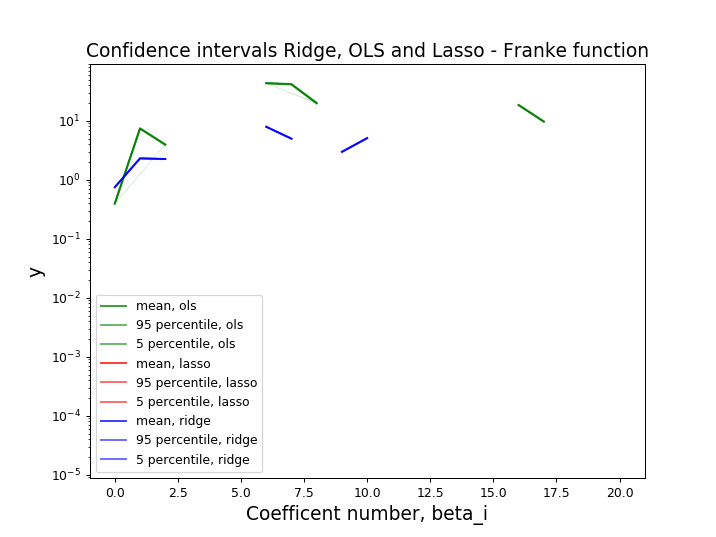

In [7]:
a,b,c, d, e, f, g, h, i = clean_reg_coeff(X, reg_coeff, nboots)
plotCI(X, a,b,c, d, e, f, g, h, i)
plt.title("Confidence intervals Ridge, OLS and Lasso - Franke function", fontsize = 15)
plt.savefig("Confidenceintervall_Franke.png")
plt.show()

In [ ]:
    #z_pred_mean = [np.array(z).mean() for z in z_pred[name]]
    # bias = np.sqrt(  np.sum(      )    )

    #z_pred_mean = [np.array(z).mean() for z in z_pred[name]]  # this is te mean for all the boots
    #bias = abs(z_true_mean - np.array(z_pred_mean).mean())

    #temp = [(np.array(z_pred[name][:,i]) - z_pred_mean) for i in range(X.shape[1])]
    #model_variance = np.sum()/nboots

In [ ]:
def bias(z_true, z_pred):
    z_pred_mean = np.array([np.array(z).mean() for z in z_pred[name]])
    val = np.sum(  np.square(  np.mean(z_true) -  np.mean(z_pred_mean) ))
    return np.sqrt(val)

In [ ]:
def model_variance(z_pred, nboots):
    val = [ (z_pred[i]  -  np.mean(z_pred[i])) for i in range(len(z_pred))  ]
    return np.sum(np.square(val))/nboots
# Not sure it should be square

# Real data confidence interval 

In [1]:
from imageio import imread
import numpy as np
from functions import generateDesignmatrix
import algorithms
from model_resample import model_resample
from functions import ci
import matplotlib.pyplot as plt

In [2]:
terrain_F = imread("Flekkefjord.tif")
terrain_M = imread("Montevideo.tif")

#x = np.linspace(1, 100, num = 100)
#y = np.linspace(1+80, 100+80, num = 100)

x = np.arange(100)
y = 2.5*x

x = np.squeeze(np.tile(x, [1,100]))
y = np.squeeze(np.tile(y, [1,100]))
z = np.ndarray.flatten(terrain_F)
p=5 
X = generateDesignmatrix(p, x, y)

/home/hanna/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_packbits'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/home/hanna/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_lzw'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/home/hanna/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'unpack_ints'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/home/hanna/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'reverse_bitorder'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))


In [3]:
# Experimental setup
models = {
    'ridge': algorithms.Ridge, 
    "ols": algorithms.OLS, 
    "lasso": algorithms.Lasso
}

lmd = {
    'ridge': [0.01], 
    'ols': [0], 
    'lasso': [0.01]
}
nboots = 100

In [4]:
mse_avg, r2_avg, reg_coeffs, bias, model_variance  = model_resample(models, lmd, X, z, nboots, split_size = 0.2)

/home/hanna/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


KeyboardInterrupt: 

In [ ]:
a,b,c, d, e, f, g, h, i = clean_reg_coeff(X, reg_coeffs, nboots)

In [ ]:
%matplotlib notebook
plotCI(X, a,b,c, d, e, f, g, h, i)
plt.title("Confidence intervals Ridge, OLS and Lasso - Flekkefjord", fontsize = 15)
plt.savefig("Confidenceintervall_F.png")
plt.show()

In [ ]:
"Label: as beta --> beta_o y --> 600 defor vi klippa bildet"

In [1]:
z = np.ndarray.flatten(terrain_M)
mse_avg, r2_avg, reg_coeffs, bias, model_variance  = model_resample(models, lmd, X, z, nboots, split_size = 0.2)

NameError: name 'np' is not defined

<IPython.core.display.Javascript object>


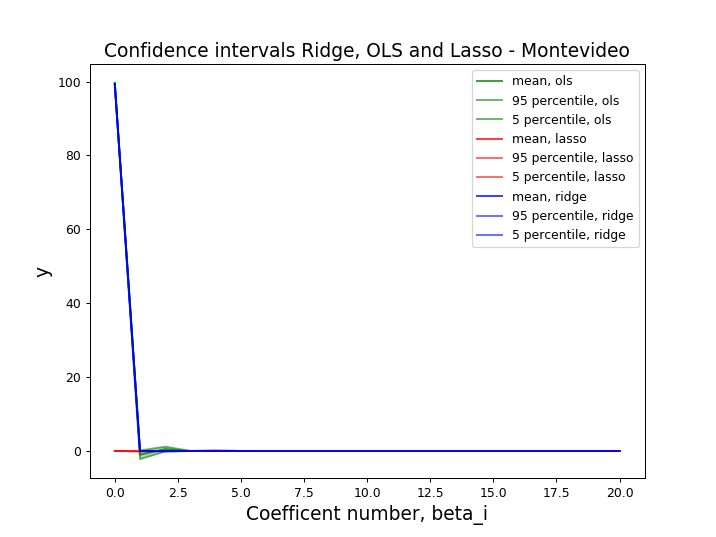

In [19]:
a,b,c, d, e, f, g, h, i = clean_reg_coeff(X, reg_coeffs, nboots)
%matplotlib notebook
plotCI(X, a,b,c, d, e, f, g, h, i)
plt.title("Confidence intervals Ridge, OLS and Lasso - Montevideo", fontsize = 15)
plt.savefig("Confidenceintervall_M.png")
plt.show()

# Testing bias and model variance